## Amazon SageMaker high-level Python library

Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file except
in compliance with the License. A copy of the License is located at

https://aws.amazon.com/apache-2-0/

or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

/Users/darkhyun/study/edx_aws_sagemaker/week3/week3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


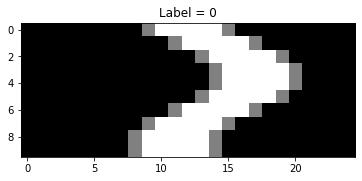

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('training.csv', header=None)
matrix = df.as_matrix()

%matplotlib inline
import matplotlib.pyplot as plt

def show_road(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((10,25))
    #subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

row = 11
show_road(matrix[row][1:], "Label = {}".format(matrix[row][0]))

In [8]:
matrix[14][1:]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

In [ ]:
multiclass_estimator = sagemaker.LinearLearner(role=role,
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)

In [ ]:
mini_batch_size = 100
records = matrix[:,:-1].astype('float32')
labels = matrix[:,0].astype('float32')
train_records = multiclass_estimator.record_set(records, labels, channel='train')
multiclass_estimator.fit([train_records])


In [ ]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

In [ ]:
labels = ["left", "straight", "right"]

experiment = np.array([[0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))

experiment = np.array([[0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))



In [ ]:
# delete endpoint
multiclass_predictor.delete_endpoint()